# US Unemployment Rate Predictions to Track Pandemic Impact in 2020

Written by Laura Prichard, 20 February 2022

**Objectives**

- Use time series prediction models to estimate expected US unemployment rate in 2020 in order to accurately measure the effects of the COVID-19 pandemic on US unemployment rate in 2020. 
- Data from 2019 will be used to test time series prediction models and then the best fitting model will be used to forecast expected unemployment rates for 2020 and compared to the actual unemployment figures by different group demographics.

**Data Used**

- Unemployment rate in the US from 2010 to 2020 downloaded from [Kaggle](https://www.kaggle.com/aniruddhasshirahatti/us-unemployment-dataset-2010-2020)
- Dataset contains time series data of unemployment rate in US from January 2010 to March 2020 (start of pandemic in US). 
- Contains unemployment rate records based on education qualification, race/ethnicity, and gender of adults.
- Comparing historical month-by-month data to average unemployment rates by age, race/ethnicity, marital status,  gender from the [US Bureau of Labor Statistics (BLS)](https://www.bls.gov/cps/aa2020/cpsaat24.htm) for 2019 and 2020.

**Skills**

- Data Cleaning
- Exploratory Data Analysis
- Feature Engineering
- Data Visualization
- Time Series Decomposition
- Testing Stationarity
- Training Time Series Models
    - Simple Average
    - Single Exponential
    - Double Exponential
    - Triple Exponential
- Time Series Forecasting
- Cross Validation

**Overview**

This investigation aimed to measure the effect of the COVID-19 pandemic on US unemployment rate by training time series prediction models. These prediction models were used to accurately determine the estimated unemployment rate in 2020, were there no pandemic. The actual unemployment rates from 2020 were then used to track the impact of the pandemic on the rate of unemployment in the US.

The unemployment rate data from Kaggle and the US Bureau of Labor Statistics were cleaned ready for analysis. Averages of the race/ethnicity and gender columns were derived for each dataset and compared to test compatibility. The race data matched, therefore this analysis only focuses on the unemployment rates measured by race. Visualization, data exploration and decomposition were used to test the nature of the time series. The data show a clear additive trend and seasonality components and are non-stationary.

Four time series models were tested:
- MODEL 1: Simple Average
- MODEL 2: Single Exponential
- MODEL 3: Double Exponential
- MODEL 4: Triple Exponential
The different models were cross validated by measuring the mean squared error (MSE) between the test data and prediction. Model 4 returned the lowest MSE score and was deemed the best fitting model as it can capture both the trend and seasonality components. 

Model 4 was then used for forecasting into 2020 and comparing the predicted unemployment rate to actual data by average race/ethnicity and for each of the four race/ethnicity identity groups available (Asian, Black, Hispanic, White). 
- Overall, the pandemic increased the unemployment rate to 9.45 compared with the predicted 3.47 (+5.98 increase).
- Black people had the highest unemployment rate in 2020 of 11.50, with an increase of 6.40 over the predicted value.
- Hispanic people had the largest increase over the predicted value of 7.07 (to 10.40).
- Asian people had a significant unemployment rate increase of 6.94 to 8.60, higher than the Jan 2010 unemployment rate when the data began.
- White people had the smallest unemployment rate increase over the predicted value of 4.19 (to 7.30), and the lowest overall unemployment rate.

**Conclusions**

**Recommending MODEL 4: Triple Exponential** for most accurate prediction and capturing the trend and seasonality in the data.  

**Next Steps**

- Data only grouped by broad demographic categories. It would be interesting to measure US unemployment rates by gender, this was not possible with these data due to discrepancies in how the values were determined between datasets. 
- Seeing a breakdown of gender, race/ethnicity and age group could provide key insights into the groups most vulnerable to unemployment in order to more proactively target policy change. 
- Comparing US unemployment rates to those from other countries would also be of interest. 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import copy
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

pd.options.display.max_rows = 200

# Load data, EDA

In [2]:
# Set data directory
data_root = "/Users/lprichard/Dropbox/Data_Science/IBM_Machine_Learning/Course6_TimeSeries/unemployment_data/"
os.chdir(data_root)

# Load in data
df = pd.read_csv('unemployment_data_us.csv')
display(df.head())
display(df.info())
df.columns.to_list()

dfp = pd.read_excel('2020avg_unemployment_bls_clean.xlsx')
display(dfp.head())
display(dfp.info())
dfp.columns.to_list()

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 132 non-null    int64  
 1   Month                132 non-null    object 
 2   Primary_School       123 non-null    float64
 3   Date                 132 non-null    object 
 4   High_School          123 non-null    float64
 5   Associates_Degree    123 non-null    float64
 6   Professional_Degree  123 non-null    float64
 7   White                123 non-null    float64
 8   Black                123 non-null    float64
 9   Asian                123 non-null    float64
 10  Hispanic             123 non-null    float64
 11  Men                  123 non-null    float64
 12  Women                123 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 13.5+ KB


None

['Year',
 'Month',
 'Primary_School',
 'Date',
 'High_School',
 'Associates_Degree',
 'Professional_Degree',
 'White',
 'Black',
 'Asian',
 'Hispanic',
 'Men',
 'Women']

,Year,White,Black,Asian,Hispanic,Men,Women
0,2019,3.3,6.1,2.7,4.3,3.7,3.6
1,2020,7.3,11.5,8.6,10.4,7.8,8.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      2 non-null      int64  
 1   White     2 non-null      float64
 2   Black     2 non-null      float64
 3   Asian     2 non-null      float64
 4   Hispanic  2 non-null      float64
 5   Men       2 non-null      float64
 6   Women     2 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 240.0 bytes


None

['Year', 'White', 'Black', 'Asian', 'Hispanic', 'Men', 'Women']

In [3]:
# Convert date to datetime format
df["DateTime"] = pd.to_datetime(df["Date"])
df = df.sort_values(by='DateTime').reset_index(drop=True)
df

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,DateTime
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9,2010-01-01
1,2010,Feb,15.8,Feb-2010,10.7,8.1,4.9,8.9,16.1,8.2,12.7,10.3,8.0,2010-02-01
2,2010,Mar,14.9,Mar-2010,11.0,8.4,4.9,8.9,16.8,7.6,12.9,10.2,8.1,2010-03-01
3,2010,Apr,14.7,Apr-2010,10.8,8.4,4.8,9.0,16.6,7.0,12.5,10.2,8.3,2010-04-01
4,2010,May,14.6,May-2010,10.9,8.2,4.6,8.7,15.5,7.8,12.0,9.7,8.1,2010-05-01
5,2010,Jun,14.2,Jun-2010,10.6,8.1,4.4,8.6,15.2,7.4,12.3,9.7,7.7,2010-06-01
6,2010,Jul,13.5,Jul-2010,10.0,8.3,4.5,8.5,15.6,7.9,12.2,9.6,7.9,2010-07-01
7,2010,Aug,14.1,Aug-2010,10.0,8.7,4.6,8.6,15.9,7.3,12.0,9.6,8.0,2010-08-01
8,2010,Sep,15.6,Sep-2010,9.7,8.9,4.5,8.6,16.0,6.6,12.3,9.6,8.0,2010-09-01
9,2010,Oct,15.0,Oct-2010,9.8,8.2,4.6,8.6,15.6,7.2,12.3,9.4,8.0,2010-10-01


In [4]:
# Add in average race and gender rates
# Kaggle Table
df['avg_race'] = df[['White', 'Black', 'Asian', 'Hispanic']].mean(axis=1)
df['avg_gender'] = df[['Men', 'Women']].mean(axis=1)

# BLS Table
dfp['avg_race'] = dfp[['White', 'Black', 'Asian', 'Hispanic']].mean(axis=1)
dfp['avg_gender'] = dfp[['Men', 'Women']].mean(axis=1)

In [5]:
# Comparing data average rates from different sources
# Kaggle Table 2019
df2019 = df.groupby(['Year']).mean().loc[2019]
df2019

# BLS Table 2019
dfp2019 = dfp.iloc[0]
dfp2019

# Get percentage offsets
labels = ['White', 'Black', 'Asian', 'Hispanic', 'avg_race', 'Men', 'Women', 'avg_gender']
for l in labels:
    print('{} offset: {:.2f}%'.format(l, ((df2019[l]-dfp2019[l])/df2019[l])*100))

Primary_School         5.350000
High_School            3.658333
Associates_Degree      3.025000
Professional_Degree    2.091667
White                  3.283333
Black                  6.075000
Asian                  2.675000
Hispanic               4.300000
Men                    3.350000
Women                  3.275000
avg_race               4.083333
avg_gender             3.312500
Name: 2019, dtype: float64

Year          2019.00
White            3.30
Black            6.10
Asian            2.70
Hispanic         4.30
Men              3.70
Women            3.60
avg_race         4.10
avg_gender       3.65
Name: 0, dtype: float64

White offset: -0.51%
Black offset: -0.41%
Asian offset: -0.93%
Hispanic offset: 0.00%
avg_race offset: -0.41%
Men offset: -10.45%
Women offset: -9.92%
avg_gender offset: -10.19%


Race metrics are accurate to 1dp. Gender metrics are off by ~10%. Will therefore focus on race metrics to measure trends and forecast.

In [6]:
# Remove NaN values in month-by-month data and sort
data = copy.deepcopy(df[['DateTime', 'Primary_School', 'High_School',
       'Associates_Degree', 'Professional_Degree', 'White', 'Black', 'Asian',
       'Hispanic', 'avg_race', 'Men', 'Women', 'avg_gender']].sort_values(by='DateTime').dropna().reset_index(drop=True))
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DateTime             123 non-null    datetime64[ns]
 1   Primary_School       123 non-null    float64       
 2   High_School          123 non-null    float64       
 3   Associates_Degree    123 non-null    float64       
 4   Professional_Degree  123 non-null    float64       
 5   White                123 non-null    float64       
 6   Black                123 non-null    float64       
 7   Asian                123 non-null    float64       
 8   Hispanic             123 non-null    float64       
 9   avg_race             123 non-null    float64       
 10  Men                  123 non-null    float64       
 11  Women                123 non-null    float64       
 12  avg_gender           123 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
m

,DateTime,Primary_School,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,avg_race,Men,Women,avg_gender
0,2010-01-01,15.3,10.2,8.6,4.9,8.8,16.5,8.3,12.9,11.625,10.2,7.9,9.05
1,2010-02-01,15.8,10.7,8.1,4.9,8.9,16.1,8.2,12.7,11.475,10.3,8.0,9.15
2,2010-03-01,14.9,11.0,8.4,4.9,8.9,16.8,7.6,12.9,11.550,10.2,8.1,9.15
3,2010-04-01,14.7,10.8,8.4,4.8,9.0,16.6,7.0,12.5,11.275,10.2,8.3,9.25
4,2010-05-01,14.6,10.9,8.2,4.6,8.7,15.5,7.8,12.0,11.000,9.7,8.1,8.90
5,2010-06-01,14.2,10.6,8.1,4.4,8.6,15.2,7.4,12.3,10.875,9.7,7.7,8.70
6,2010-07-01,13.5,10.0,8.3,4.5,8.5,15.6,7.9,12.2,11.050,9.6,7.9,8.75
7,2010-08-01,14.1,10.0,8.7,4.6,8.6,15.9,7.3,12.0,10.950,9.6,8.0,8.80
8,2010-09-01,15.6,9.7,8.9,4.5,8.6,16.0,6.6,12.3,10.875,9.6,8.0,8.80
9,2010-10-01,15.0,9.8,8.2,4.6,8.6,15.6,7.2,12.3,10.925,9.4,8.0,8.70


In [7]:
# Reset date as index
data.set_index('DateTime', inplace=True)
data

,Primary_School,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,avg_race,Men,Women,avg_gender
DateTime,,,,,,,,,,,,
2010-01-01,15.3,10.2,8.6,4.9,8.8,16.5,8.3,12.9,11.625,10.2,7.9,9.05
2010-02-01,15.8,10.7,8.1,4.9,8.9,16.1,8.2,12.7,11.475,10.3,8.0,9.15
2010-03-01,14.9,11.0,8.4,4.9,8.9,16.8,7.6,12.9,11.550,10.2,8.1,9.15
2010-04-01,14.7,10.8,8.4,4.8,9.0,16.6,7.0,12.5,11.275,10.2,8.3,9.25
2010-05-01,14.6,10.9,8.2,4.6,8.7,15.5,7.8,12.0,11.000,9.7,8.1,8.90
2010-06-01,14.2,10.6,8.1,4.4,8.6,15.2,7.4,12.3,10.875,9.7,7.7,8.70
2010-07-01,13.5,10.0,8.3,4.5,8.5,15.6,7.9,12.2,11.050,9.6,7.9,8.75
2010-08-01,14.1,10.0,8.7,4.6,8.6,15.9,7.3,12.0,10.950,9.6,8.0,8.80
2010-09-01,15.6,9.7,8.9,4.5,8.6,16.0,6.6,12.3,10.875,9.6,8.0,8.80


# Visualization

Identify if time series is additive or multiplicative and has trend and/or seasonality components.

<AxesSubplot:title={'center':'Unemployment Rate'}, xlabel='DateTime'>

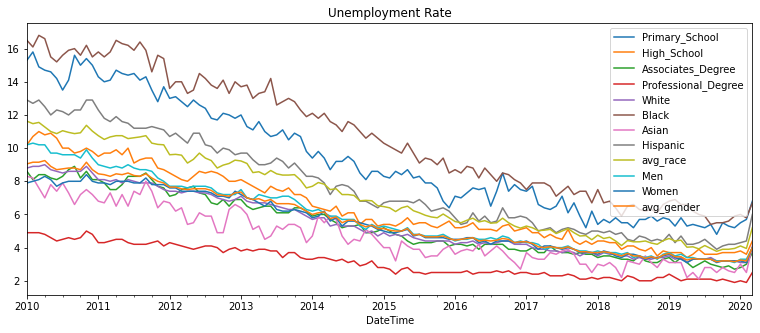

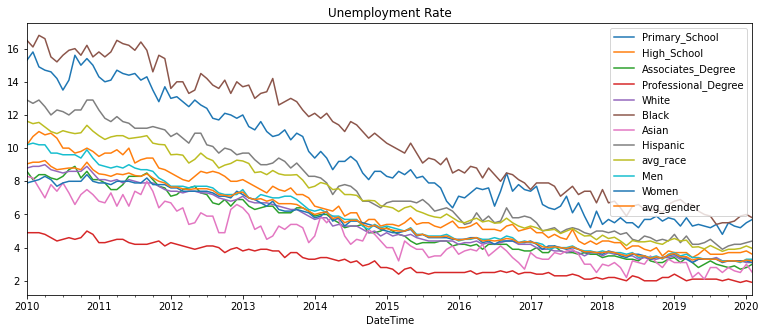

In [8]:
# Visually inspect data
plotsize = (13, 5)
_=data.plot(figsize=plotsize, title='Unemployment Rate')
data[:'2020-02'].plot(figsize=plotsize, title='Unemployment Rate')

# Decomposition

Unemployment rate shows trend and seasonality and is additive. Decomposing components of data (from 2010-Jan to 2019-Dec) into 6 month chunks for seasonality (18 periods).

In [9]:
# Decompose data to pull out trend, seasonality and residuals
ss_decomposition = seasonal_decompose(x=data['avg_race'][:120], 
                                      model='additive', 
                                      period=18)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

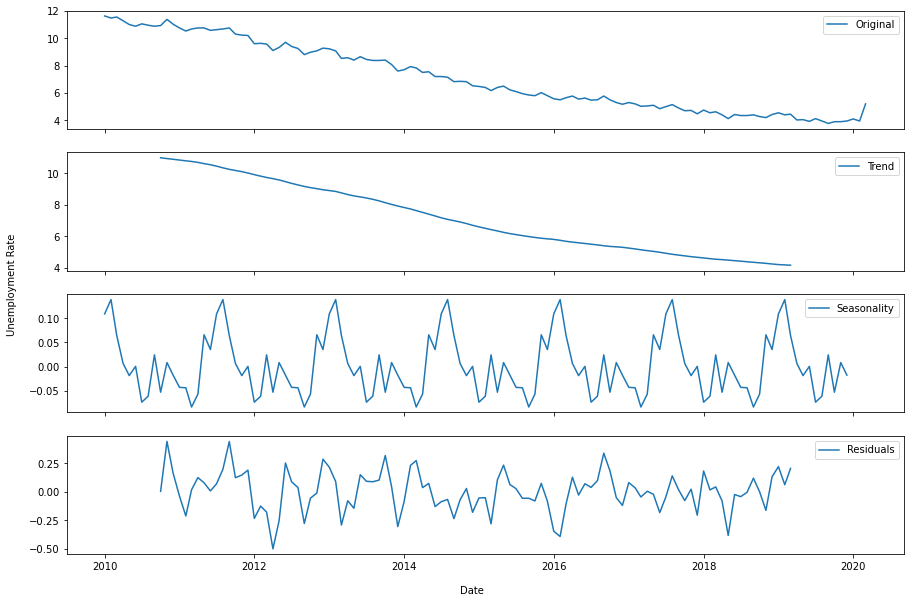

In [10]:
# Plot individual components
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

_=axes[0].plot(data['avg_race'], label='Original')
_=axes[0].legend(loc='upper right')

_=axes[1].plot(estimated_trend, label='Trend')
_=axes[1].legend(loc='upper right')

_=axes[2].plot(estimated_seasonal, label='Seasonality')
_=axes[2].legend(loc='upper right')

_=axes[3].plot(estimated_residual, label='Residuals')
_=axes[3].legend(loc='upper right')

_=fig.text(0.5, 0.07, 'Date', ha='center')
_=fig.text(0.07, 0.5, 'Unemployment Rate', va='center', rotation='vertical')

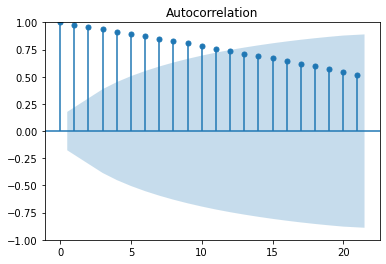

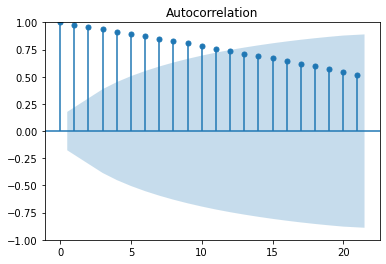

In [11]:
# Test Autocorrelation
plot_acf(data['avg_race'])

# Check for Stationarity

In [12]:
# Split data into 10 chunks, inc. 2010-2019 data
chunks = np.split(data['avg_race'].iloc[0:120], indices_or_sections=10)
chunks

[DateTime
 2010-01-01    11.625
 2010-02-01    11.475
 2010-03-01    11.550
 2010-04-01    11.275
 2010-05-01    11.000
 2010-06-01    10.875
 2010-07-01    11.050
 2010-08-01    10.950
 2010-09-01    10.875
 2010-10-01    10.925
 2010-11-01    11.375
 2010-12-01    11.025
 Name: avg_race, dtype: float64,
 DateTime
 2011-01-01    10.750
 2011-02-01    10.525
 2011-03-01    10.675
 2011-04-01    10.750
 2011-05-01    10.750
 2011-06-01    10.575
 2011-07-01    10.625
 2011-08-01    10.675
 2011-09-01    10.750
 2011-10-01    10.300
 2011-11-01    10.225
 2011-12-01    10.200
 Name: avg_race, dtype: float64,
 DateTime
 2012-01-01    9.600
 2012-02-01    9.625
 2012-03-01    9.575
 2012-04-01    9.100
 2012-05-01    9.325
 2012-06-01    9.700
 2012-07-01    9.400
 2012-08-01    9.250
 2012-09-01    8.800
 2012-10-01    8.975
 2012-11-01    9.075
 2012-12-01    9.275
 Name: avg_race, dtype: float64,
 DateTime
 2013-01-01    9.225
 2013-02-01    9.075
 2013-03-01    8.525
 2013-04-01    8.5

In [13]:
# Compare means and variances of chunks
np.mean(chunks, axis=1)
np.var(chunks, axis=1)

array([11.16666667, 10.56666667,  9.30833333,  8.47708333,  7.25625   ,
        6.14166667,  5.53333333,  4.95625   ,  4.40625   ,  4.08333333])

array([0.07034722, 0.04045139, 0.07420139, 0.16025608, 0.18355469,
       0.06263889, 0.02753472, 0.05136719, 0.02772135, 0.05680556])

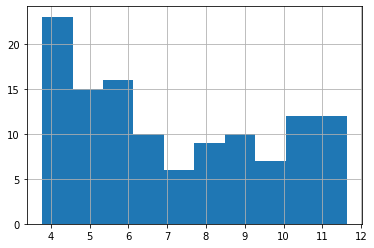

In [14]:
# Test stationarity of original data (Gaussian dist. expected if stationary)
data['avg_race'].iloc[0:120].hist();

In [15]:
# Run ADF Test on original data (stationarity not expected)
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(data['avg_race'].iloc[0:120], regression='c')
print("ADF: {:.2f}".format(adf))
print("p-value: {:.2f}".format(pvalue))
print("Critical values: ", critical_values)

ADF: -1.59
p-value: 0.49
Critical values:  {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}


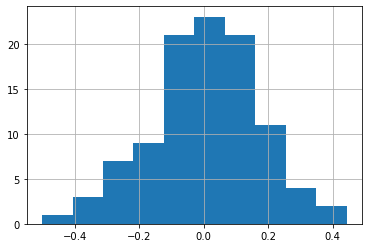

In [16]:
# Test stationarity of residuals (Gaussian dist. expected if stationary)
estimated_residual.iloc[0:120].hist();

In [17]:
# Get statistics of stationary residuals data
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(estimated_residual.dropna())
print("ADF: {:.2f}".format(adf))
print("p-value: {}".format(pvalue))
print("Critical values: ", critical_values)

ADF: -7.15
p-value: 3.16460664221238e-10
Critical values:  {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349}


# Smoothing

In [18]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(3))
    else:
        return cumulative_sum[window - 1:] / window

In [19]:
# Get arrays of time and data
time = data['avg_race'].iloc[:120].index
dat = data['avg_race'].iloc[:120].values

In [20]:
# Smooth data in quarterly windows
window=3
sdat = moving_average(dat, window=window, forecast=False)

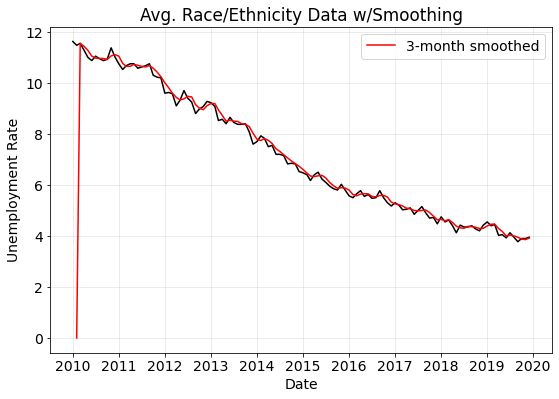

In [21]:
# Plot unsmoothed and smoothed data
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(time, dat, 'k-')
_=plt.plot(time[1:], np.insert(sdat,0,0), 'r', label="{}-month smoothed".format(window))
_=plt.legend()
_=plt.title("Avg. Race/Ethnicity Data w/Smoothing")
_=plt.grid(alpha=0.3)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

In [22]:
len(sdat)
len(time)

118

120

# Testing Models

Cross-validating models with mean squared error (MSE). 

Using same train and test splits for all models: 
- train data (2010-Jan to 2019-June)
- test data (final 6 months: 2019-July to 2019-December)

In [23]:
def mse(observations, estimates):
    '''
    Mean squared error (MSE) of data (observations) and predictions (estimates).
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean square error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [24]:
# Split data into train and test sets
train = dat[:-6]
test = dat[-6:]

# Split smoothed data into train and test sets
strain = sdat[3:-6]
stest = sdat[-6:]

# Define adjusted time array for smoothed data
stime = time[4:-1]

**Simple Average**

Unsmoothed data

In [25]:
# Get simple prediction and MSE as baseline
# Find mean of series
dat_avg = np.mean(dat)

# Create array of mean value equal to length of time array
simple_avg_preds = np.full(shape=len(test), fill_value=dat_avg, dtype='float')

# Calculate MSE
simple_mse = mse(test, simple_avg_preds)

# Print results
print("Predictions: ", simple_avg_preds)
print("MSE: ", simple_mse)

Predictions:  [7.18958333 7.18958333 7.18958333 7.18958333 7.18958333 7.18958333]
MSE:  63.68356770833332


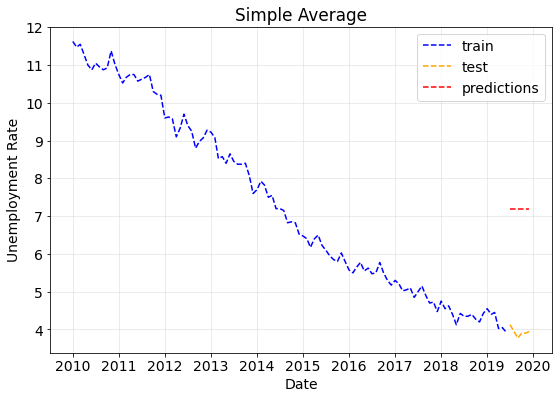

In [26]:
# Plot data and predictions
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(time[:-6], train, 'b--', label="train")
_=plt.plot(time[-6:], test, color='orange', linestyle="--", label="test")
_=plt.plot(time[-6:], simple_avg_preds, 'r--', label="predictions")
_=plt.legend(loc='upper right')
_=plt.title("Simple Average")
_=plt.grid(alpha=0.3)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

Smoothed data

In [27]:
# Get simple prediction and MSE as baseline
# Find mean of series
sdat_avg = np.nanmean(sdat)

# Create array of mean value equal to length of time array
ssimple_avg_preds = np.full(shape=len(stest), fill_value=sdat_avg, dtype='float')

# MSE
ssimple_mse = mse(stest, ssimple_avg_preds)

# Print results
print("Predictions: ", ssimple_avg_preds)
print("MSE: ", ssimple_mse)

Predictions:  [7.18001412 7.18001412 7.18001412 7.18001412 7.18001412 7.18001412]
MSE:  63.05319934206344


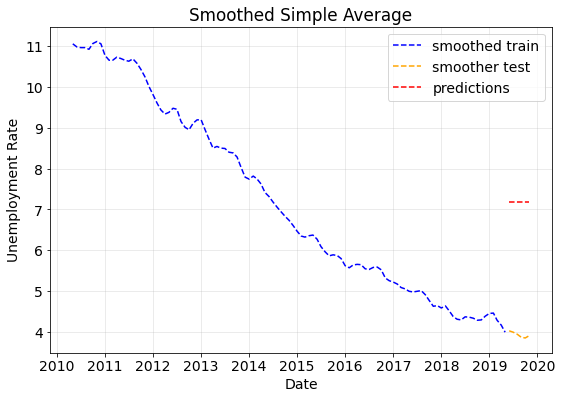

In [28]:
# Plot data and predictions
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(stime[:-6], strain, 'b--', label="smoothed train")
_=plt.plot(stime[-6:], stest, color='orange', linestyle="--", label="smoother test")
_=plt.plot(stime[-6:], ssimple_avg_preds, 'r--', label="predictions")
_=plt.legend(loc='upper right')
_=plt.title("Smoothed Simple Average")
_=plt.grid(alpha=0.3)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

**Single Exponential**

Unsmoothed data

In [29]:
# Get single exponential prediction
single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))
single_mse = mse(test, single_preds)
print("Predictions: ", single_preds)
print("MSE: ", single_mse)

Predictions:  [3.93071432 3.93071432 3.93071432 3.93071432 3.93071432 3.93071432]
MSE:  0.06462448862985465


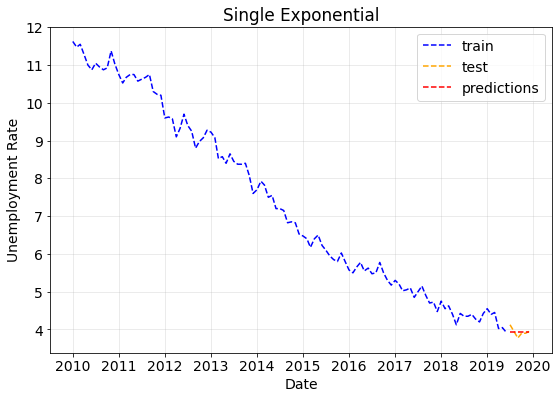

In [30]:
# Plot data and predictions
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(time[:-6], train, 'b--', label="train")
_=plt.plot(time[-6:], test, color='orange', linestyle="--", label="test")
_=plt.plot(time[-6:], single_preds, 'r--', label="predictions")
_=plt.legend(loc='upper right')
_=plt.title("Single Exponential")
_=plt.grid(alpha=0.3)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

Smoothed data

In [31]:
# Get single exponential prediction for smoothed data
ssingle = SimpleExpSmoothing(strain).fit(optimized=True)
ssingle_preds = ssingle.forecast(len(stest))
ssingle_mse = mse(stest, ssingle_preds)
print("Predictions: ", ssingle_preds)
print("MSE: ", ssingle_mse)

Predictions:  [4. 4. 4. 4. 4. 4.]
MSE:  0.04625000191229213


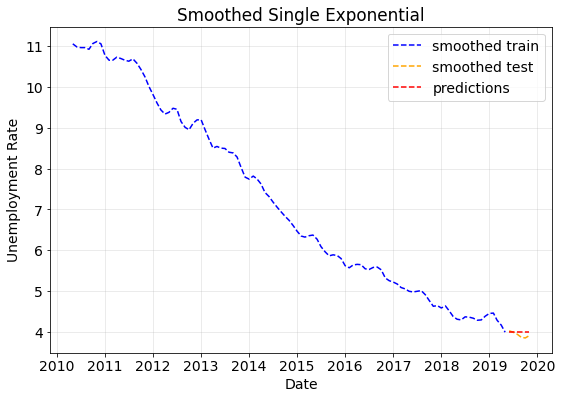

In [32]:
# Plot data and predictions
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(stime[:-6], strain, 'b--', label="smoothed train")
_=plt.plot(stime[-6:], stest, color='orange', linestyle="--", label="smoothed test")
_=plt.plot(stime[-6:], ssingle_preds, 'r--', label="predictions")
_=plt.legend(loc='upper right')
_=plt.title("Smoothed Single Exponential")
_=plt.grid(alpha=0.3)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

**Double Exponential**

In [33]:
# Get double exponential (Holt) prediction
double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test, double_preds)
print("Predictions: ", double_preds)
print("MSE: ", double_mse)

Predictions:  [3.87876566 3.81101669 3.74326771 3.67551873 3.60776975 3.54002077]
MSE:  0.3848279795058305


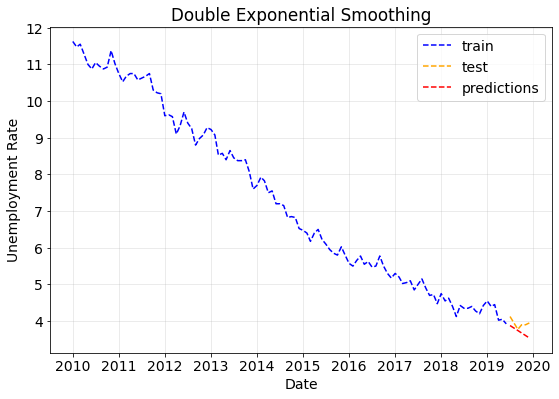

In [34]:
# Plot data and predictions
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(time[:-6], train, 'b--', label="train")
_=plt.plot(time[-6:], test, color='orange', linestyle="--", label="test")
_=plt.plot(time[-6:], double_preds, 'r--', label="predictions")
_=plt.legend(loc='upper right')
_=plt.title("Double Exponential Smoothing")
_=plt.grid(alpha=0.3)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

In [35]:
# Get double exponential prediction for smoothed data
sdouble = Holt(strain).fit(optimized=True)
sdouble_preds = sdouble.forecast(len(stest))
sdouble_mse = mse(stest, sdouble_preds)
print("Predictions: ", sdouble_preds)
print("MSE: ", sdouble_mse)

Predictions:  [3.93472136 3.86944273 3.80416409 3.73888545 3.67360681 3.60832817]
MSE:  0.1957613211327956


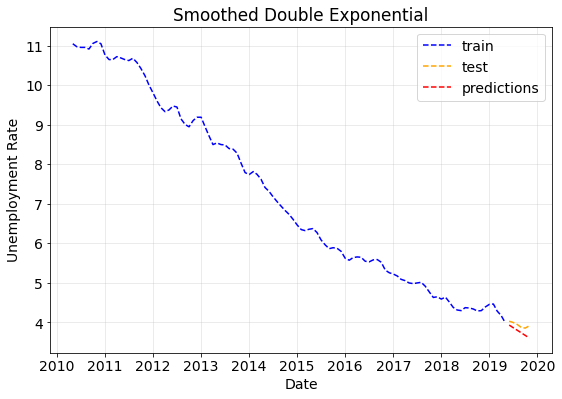

In [36]:
# Plot data and predictions
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(stime[:-6], strain, 'b--', label="train")
_=plt.plot(stime[-6:], stest, color='orange', linestyle="--", label="test")
_=plt.plot(stime[-6:], sdouble_preds, 'r--', label="predictions")
_=plt.legend(loc='upper right')
_=plt.title("Smoothed Double Exponential")
_=plt.grid(alpha=0.3)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

#### Triple Exponential

In [37]:
# Get triple exponential fit predictions
triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=20).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)
print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

Predictions:  [3.98369634 4.00368593 3.93864488 3.85371005 3.73368296 3.65358024]
MSE:  0.16729734356629453


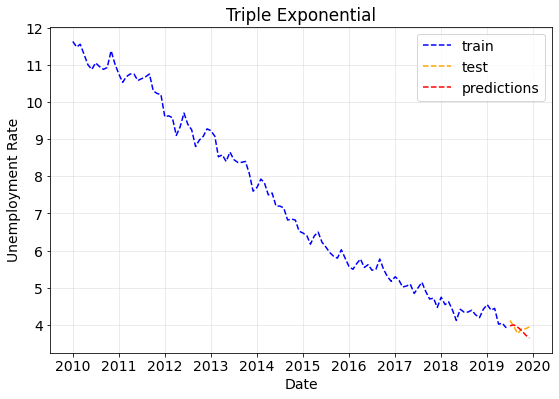

In [38]:
# Plot data and predictions
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(time[:-6], train, 'b--', label="train")
_=plt.plot(time[-6:], test, color='orange', linestyle="--", label="test")
_=plt.plot(time[-6:], triple_preds, 'r--', label="predictions")
_=plt.legend(loc='upper right')
_=plt.title("Triple Exponential")
_=plt.grid(alpha=0.3)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

In [39]:
# Get triple exponential fit predictions on smoothed data
striple = ExponentialSmoothing(strain,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=20).fit(optimized=True)
striple_preds = striple.forecast(len(stest))
striple_mse = mse(stest, striple_preds)
print("Predictions: ", striple_preds)
print("MSE: ", striple_mse)

Predictions:  [3.92940159 3.94200654 3.97783514 3.95691767 3.88919083 3.81642215]
MSE:  0.032651496497380285


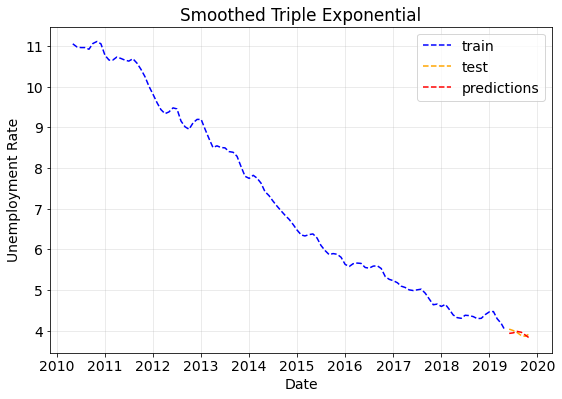

In [40]:
# Plot data and predictions
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(stime[:-6], strain, 'b--', label="train")
_=plt.plot(stime[-6:], stest, color='orange', linestyle="--", label="test")
_=plt.plot(stime[-6:], striple_preds, 'r--', label="predictions")
_=plt.legend(loc='upper right')
_=plt.title("Smoothed Triple Exponential")
_=plt.grid(alpha=0.3)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

# Forecasting by Average Race/Ethnicity

Triple exponential fit performs best for smoothed data. Data has trend and a seasonal component which is best captured by a triple exponential model.

In [41]:
# Predicting 2020 expected values with no pandemic
striple_preds2020 = striple.forecast(len(stest)+13)

In [42]:
# Determining effects of pandemic on unemployment rate
avg2020 = np.mean(striple_preds2020[-12:])
actual2020 = dfp[dfp['Year']==2020]['avg_race'].values[0]
diff2020 = actual2020-avg2020

# Print outputs
print('Unemployment Rate 2020 (Avg. Race/Ethnicity), predicted: {:.2f}, actual: {:.2f}, offset: {:.2f}'.format(avg2020, actual2020, diff2020))

Unemployment Rate 2020 (Avg. Race/Ethnicity), predicted: 3.47, actual: 9.45, offset: 5.98


In [43]:
# Define 2020 time array
time2020 = np.arange('2020-01', '2021-01', dtype='datetime64[M]')
time2020

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
      dtype='datetime64[M]')

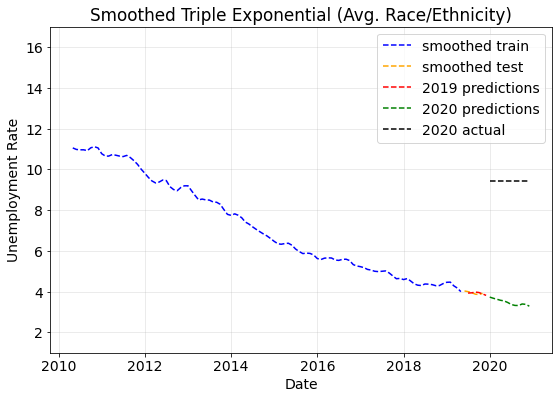

In [44]:
# Plot data and predictions
_=plt.figure(figsize=(9,6))
_=plt.rcParams['font.size'] = '14'
_=plt.plot(stime[:-6], strain, 'b--', label="smoothed train")
_=plt.plot(stime[-6:], stest, color='orange', linestyle="--", label="smoothed test")
_=plt.plot(time[-6:], striple_preds, 'r--', label="2019 predictions")
_=plt.plot(time2020, striple_preds2020[-12:], 'g--', label="2020 predictions")
_=plt.plot(time2020, np.full_like(striple_preds2020[-12:], actual2020), 'k--', label="2020 actual")
_=plt.legend(loc='upper right')
_=plt.title("Smoothed Triple Exponential (Avg. Race/Ethnicity)")
_=plt.grid(alpha=0.3)
_=plt.ylim(1, 17)
_=plt.ylabel('Unemployment Rate')
_=plt.xlabel('Date')

# Forecasting by Race/Ethnicity

Triple Exp. MSE: 1.41
Unemployment Rate 2020 (Asian), predicted: 1.66, actual: 8.60, offset: 6.94




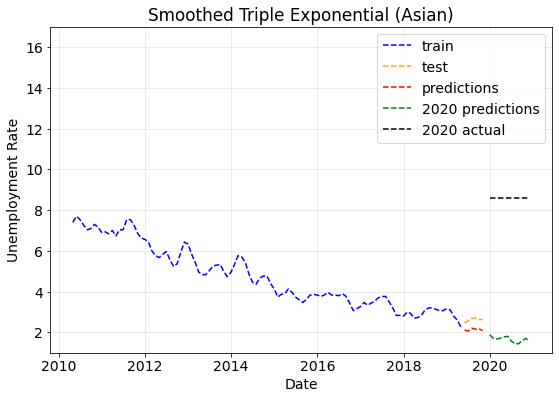

Triple Exp. MSE: 1.90
Unemployment Rate 2020 (Black), predicted: 5.10, actual: 11.50, offset: 6.40




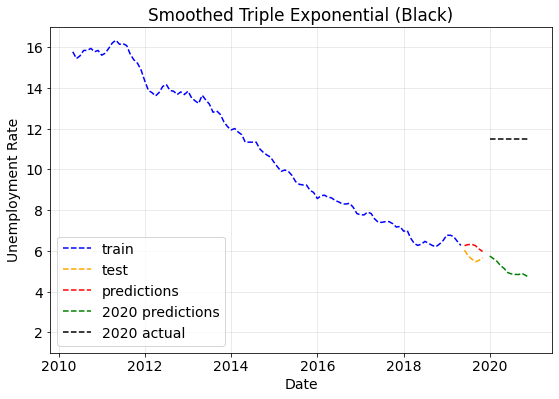

Triple Exp. MSE: 0.56
Unemployment Rate 2020 (Hispanic), predicted: 3.33, actual: 10.40, offset: 7.07




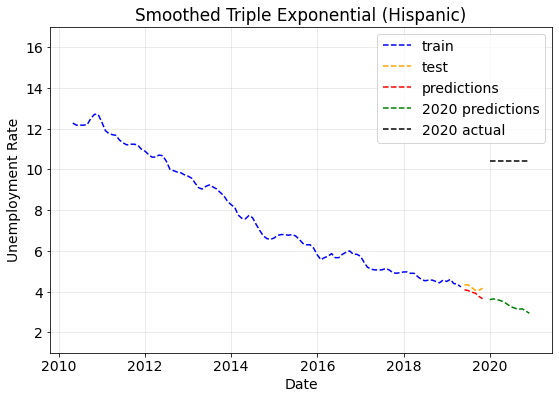

Triple Exp. MSE: 0.03
Unemployment Rate 2020 (White), predicted: 3.11, actual: 7.30, offset: 4.19




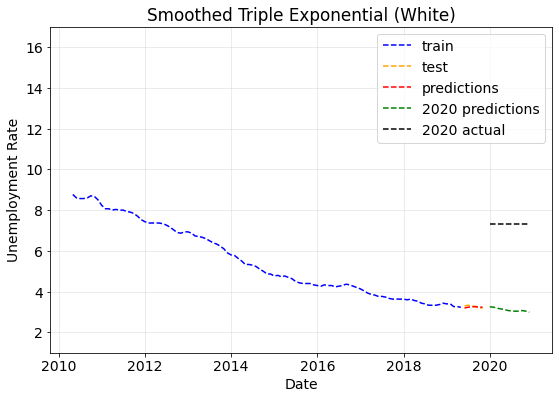

In [45]:
# Define race/ethnicity labels
labs = ['Asian', 'Black', 'Hispanic', 'White']

for lab in labs:
    # Get arrays of time and data
    time = data[lab].iloc[:120].index
    dat = data[lab].iloc[:120].values

    # Smooth data in quarterly windows
    sdat = moving_average(dat, window=3, forecast=False)

    # Define train and test sets for smoothed data
    strain = sdat[3:-6]
    stest = sdat[-6:]
    
    # Define adjusted time array for smoothed data
    stime = time[4:-1]
    
    # Fit triple exponential to smoothed data
    striple = ExponentialSmoothing(strain,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=20).fit(optimized=True)
    striple_preds = striple.forecast(len(stest))
    striple_mse = mse(stest, striple_preds)
    # print("Triple Exp. Predictions: ", striple_preds)
    
    # Predicting 2020 expected values with no pandemic
    striple_preds2020 = striple.forecast(len(stest)+13)
    
    # Determining effects of pandemic on unemployment rate
    avg2020 = np.mean(striple_preds2020[-12:])
    actual2020 = dfp[dfp['Year']==2020][lab].values[0]
    diff2020 = actual2020-avg2020
    
    # Print outputs
    print("Triple Exp. MSE: {:.2f}".format(striple_mse))
    print('Unemployment Rate 2020 ({}), predicted: {:.2f}, actual: {:.2f}, offset: {:.2f}\n\n'.format(lab, avg2020, actual2020, diff2020))
    
    # Define 2020 time array
    time2020 = np.arange('2020-01', '2021-01', dtype='datetime64[M]')
    
    # Plot data and predictions
    _=plt.figure(figsize=(9,6))
    _=plt.rcParams['font.size'] = '14'
    _=plt.plot(stime[:-6], strain, 'b--', label="train")
    _=plt.plot(stime[-6:], stest, color='orange', linestyle="--", label="test")
    _=plt.plot(stime[-6:], striple_preds, 'r--', label="predictions")
    _=plt.plot(time2020, striple_preds2020[-12:], 'g--', label="2020 predictions")
    _=plt.plot(time2020, np.full_like(striple_preds2020[-12:], actual2020), 'k--', label="2020 actual")
    _=plt.legend()
    _=plt.title("Smoothed Triple Exponential ({})".format(lab))
    _=plt.grid(alpha=0.3)
    _=plt.ylim(1, 17)
    _=plt.ylabel('Unemployment Rate')
    _=plt.xlabel('Date')
    _=plt.show()